# Regressão Linear Multivariada - Trabalho

## Estudo de caso: Qualidade de Vinhos

Nesta trabalho, treinaremos um modelo de regressão linear usando descendência de gradiente estocástico no conjunto de dados da Qualidade do Vinho. O exemplo pressupõe que uma cópia CSV do conjunto de dados está no diretório de trabalho atual com o nome do arquivo *winequality-white.csv*.

O conjunto de dados de qualidade do vinho envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse, mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 variáveis de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

O desempenho de referencia de predição do valor médio é um RMSE de aproximadamente 0.148 pontos de qualidade.

Utilize o exemplo apresentado no tutorial e altere-o de forma a carregar os dados e analisar a acurácia de sua solução. 


## Definição das Bibliotecas e Funções Principais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
def RMSE(errors):
    return np.sqrt(1/errors.shape[1] * np.sum(errors**2))

def predict(X, coef, addOnes=False):
    if(addOnes): X = np.append(np.ones([X.shape[0], 1]), X, axis=1)
    return np.dot(X, coef).reshape(1, X.shape[0])

def stochasticGD(X, y, alfa=0.00001, maxEpoch=50):
    X = np.append(np.ones([X.shape[0], 1]), X, axis=1)
    coef = np.random.randn(X.shape[1], 1)
    errorHist = []
    
    for epoch in range(maxEpoch):
        error =  predict(X, coef) - y
        errorHist.append(RMSE(error))
        
        for i in range(X.shape[0]):
            coef[0] -= alfa * error[0,i]
            for j in range(len(coef)-1):
                coef[j+1] -= alfa * error[0,i] * X[i,j]
                
        print("Epoch: {} | RMSE: {}".format(epoch, errorHist[-1]))
        print("Coefficients: \n", coef.T)
        print("\n###")
    
    return coef, errorHist

## Carregando o conjunto de dados e utilizando o Gradiente Descendente Estocástico

In [3]:
data = pd.read_csv("winequality-white.csv", delimiter=";")

X = MinMaxScaler().fit_transform(data.values[:,:-1])
y = data.values[:,-1]

In [4]:
[coef, errorHist] = stochasticGD(X, y)

Epoch: 0 | RMSE: 5.603006430346713
Coefficients: 
 [[ 1.41482737 -0.14446488 -1.36397147 -1.72856557  0.25729327  0.29945667
  -1.72824681 -0.14588103  1.0290101   0.72245113 -0.25032003 -0.22558473]]

###
Epoch: 1 | RMSE: 5.116385508659133
Coefficients: 
 [[ 1.66132821  0.10203597 -1.29172991 -1.68097011  0.30732737  0.32096455
  -1.70195755 -0.11703484  1.10247275  0.75444081 -0.14551486 -0.14777653]]

###
Epoch: 2 | RMSE: 4.674617386194008
Coefficients: 
 [[ 1.88584284  0.3265506  -1.22602007 -1.63768232  0.35290373  0.34050594
  -1.67806477 -0.09074454  1.16930883  0.78348593 -0.05005471 -0.07696228]]

###
Epoch: 3 | RMSE: 4.273807335226205
Coefficients: 
 [[ 2.09033743  0.53104519 -1.16625786 -1.59831694  0.394421    0.35825667
  -1.65635417 -0.06678155  1.23011095  0.8098498   0.03689623 -0.01251654]]

###
Epoch: 4 | RMSE: 3.9104159314646747
Coefficients: 
 [[ 2.27660233  0.71731009 -1.11191145 -1.56252317  0.43224216  0.37437687
  -1.63663059 -0.04493775  1.2854187   0.83377217 

Epoch: 40 | RMSE: 0.9286534292870214
Coefficients: 
 [[ 4.12501913  2.56572689 -0.59858325 -1.22542271  0.80900247  0.52020768
  -1.45599782  0.17680202  1.81253484  1.04440547  0.90335431  0.61227268]]

###
Epoch: 41 | RMSE: 0.9270708613758998
Coefficients: 
 [[ 4.13146123  2.57216899 -0.59767056 -1.22485049  0.81036344  0.52023995
  -1.45587435  0.17774153  1.8136417   1.04424009  0.9061527   0.61371266]]

###
Epoch: 42 | RMSE: 0.9257576719188847
Coefficients: 
 [[ 4.13738479  2.57809255 -0.5969123  -1.22437952  0.81161924  0.5202257
  -1.45580738  0.17862075  1.81459217  1.04400511  0.90873162  0.61498754]]

###
Epoch: 43 | RMSE: 0.9246688483158175
Coefficients: 
 [[ 4.14283617  2.58354392 -0.59629471 -1.2240007   0.81277927  0.52016908
  -1.45579186  0.17944509  1.81540023  1.04370673  0.91111077  0.61611207]]

###
Epoch: 44 | RMSE: 0.9237668400669623
Coefficients: 
 [[ 4.14785758  2.58856534 -0.59580525 -1.22370576  0.8138521   0.52007386
  -1.45582319  0.18021944  1.81607859  1.0

In [5]:
print("Gradiente Descendente Estocástico\nRMSE: {}".format(RMSE(y - predict(X, coef, True))))
print("Coeficientes:\n", coef.T)

Gradiente Descendente Estocástico
RMSE: 0.9208463821240235
Coeficientes:
 [[ 4.16774675  2.6084545  -0.59491402 -1.22324803  0.81815785  0.51912891
  -1.45654833  0.1834846   1.81789618  1.04086892  0.922091    0.62037561]]


## Plotagem do Custo por Época

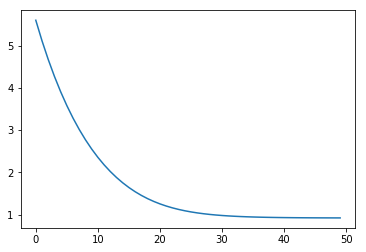

In [6]:
plt.plot(errorHist)
plt.show()

## Estimativa dos Coeficientes pelo Método dos Mínimos Quadrados (OLS)

In [7]:
X = np.append(np.ones([X.shape[0], 1]), X, axis=1)
beta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)), X.T), y)

print("Métodos dos Mínimos Quadrados\nRMSE: {}".format(RMSE(y - predict(X,beta))))
print("Coeficientes:\n", beta)

Métodos dos Mínimos Quadrados
RMSE: 0.7504359153109991
Coeficientes:
 [ 5.55089003  0.6814076  -1.90044063  0.03666973  5.31267873 -0.08333219
  1.07130361 -0.12315714 -7.79524045  0.75497812  0.54306977  1.19954932]


## Comentários

Obs.: Os dados desse dataset foram disponibilizados pela Universidade do Minho (Portugal) :P

Primeiramente, é interessante notar que os dados de saída ($Y$), o atributo "Quality", possue apenas valores discretos e bastante baixos. Em contra-partida, os atributos de entrada ($X$) se apresentam em várias escalas, e podem ser bem maiores que os valores de saída. Por esse motivo, para manter a estabilidade do Stochastic Gradient Descent, é necessário realizar algum tipo de Feature Scaling para normalizar os dados de entrada, gerando assim um treinamento mais estável.

No meu código, utilizei a classe MinMaxScaler do próprio Scikit-Learn para realizar essa normalização de forma rápida. O Min-Max Scaling consiste em, para cada atributo, subtrair todos os valores pelo menor valor e dividir isso pela diferença entre o maior e menor valor. Isso garante, então, que todos os dados serão dispostos no intervalo fechado [0, 1].

No meu código, também, utilizei a notação matricial das operações entre os coeficientes ($\beta$) e os dados de entrada ($X$). Isso permite uma computação mais rápida, com menos linhas de códigos, e ainda mantém todas as características originais do problema. Uma outra estivativa de coeficientes, utilizando o Método dos Mínimos Quadrados, também foi apresentada e mostrou resultados similares aos do Gradiente Descendente Estocástico.